In [5]:
#import stuff
from matplotlib import pyplot as plt
from astropy.io import ascii
import numpy as np
from Finding_Effective_Wavelengths import finding_eff_waves

#Read in files
path = r'''C:\Users\Anna\Learning-Python-master'''
zfile = path + r'''\compilation_SpARCS-0035.dat'''
zdat = ascii.read(zfile)
photfile = path + r'''\SpARCS-0035_totalall_HAWKIKs.cat'''
photdat = ascii.read(photfile)


In [18]:
#Parametrize

#good_flux corresponds to k band mag < 23
good_flux = 10**0.8
#Parameters for good photometry, redshift, and flux
izspec = np.where((zdat['spec_z'] > 0) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (photdat['HAWKIKs'] > good_flux))
izspec = izspec[0]

#this prints the rows of the two tables that correspond to these indices
#print(photdat['id'][izspec],zdat['PHOTCATID'][izspec],zdat['spec_z'][izspec])

eff_waves = finding_eff_waves() #eff_wave is in angstrom
#print("Effective wavelengths in angstroms: ",eff_waves[39])
index = [39,26,27,28,29,30,45,32,37,40,41,42,43]
g_wave = [1,2,3,4,5,6,7,8,9,10,11,12,13] #dummy values
for i in range(len(index)):
    g_wave[i] = (eff_waves[index[i]]) #wavelength in angstrom
g_wave = np.array(g_wave)
#print("Wavelengths of filters in meters: ",g_wave)

#Frequency in Hz
g_freq = (2.99*(10**8))/(g_wave*(10**-6))   
#print (g_freq)

#Getting flux in each filter for 5 galaxies
#filt_names = HAWKIKs,VIMOSU,VIMOSB,VIMOSV,VIMOSR,VIMOSI,DECamz,FOURSTARJ1,HAWKIJ,IRAC1,IRAC2,IRAC3,IRAC4 
g = [1202,2226,3115,4444,4811] #indices for 5 random galaxies
#Catalog fluxes:
fnu = [[1,2,3,4,5,6,7,8,9,10,11,12,13],[1,2,3,4,5,6,7,8,9,10,11,12,13],[1,2,3,4,5,6,7,8,9,10,11,12,13],[1,2,3,4,5,6,7,8,9,10,11,12,13],[1,2,3,4,5,6,7,8,9,10,11,12,13]]
for i in range(len(g)):
    fnu[i] = photdat['HAWKIKs'][g[i]],photdat['VIMOSU'][g[i]],photdat['VIMOSB'][g[i]],photdat['VIMOSV'][g[i]],photdat['VIMOSR'][g[i]], photdat['VIMOSI'][g[i]], photdat['DECamz'][g[i]],photdat['FOURSTARJ1'][g[i]],photdat['HAWKIJ'][g[i]],photdat['IRAC1'][g[i]],photdat['IRAC2'][g[i]],photdat['IRAC3'][g[i]],photdat['IRAC4'][g[i]]
        #print(photdat['HAWKIKs'][g[i]])
#print(fnu)

fnu = np.array(fnu)
f = fnu #placeholder values
f=np.array(f)
#Finding fnu from the catalog flux, which is a ratio of fnu over f(m=25)
for i in fnu:
    for j in i:
        f = (fnu*.3631)*(10**-6)*(10**-23) # *.3631 to convert from ratio to uJy, *10^-6 to convert to Jy, *10^-23 to convert to ergs/s/cm^2/Hz


#Converting to flambda
flambda = f #placeholder values
flambda = np.array(flambda)
for i in f:
    for j in i:
        flambda = (f*(2.99)*(10**10)*(10**8))/(g_wave**2) #should give flambda in erg/s/cm^2/A
#print(flambda[1])


C:\Users\Anna\Anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


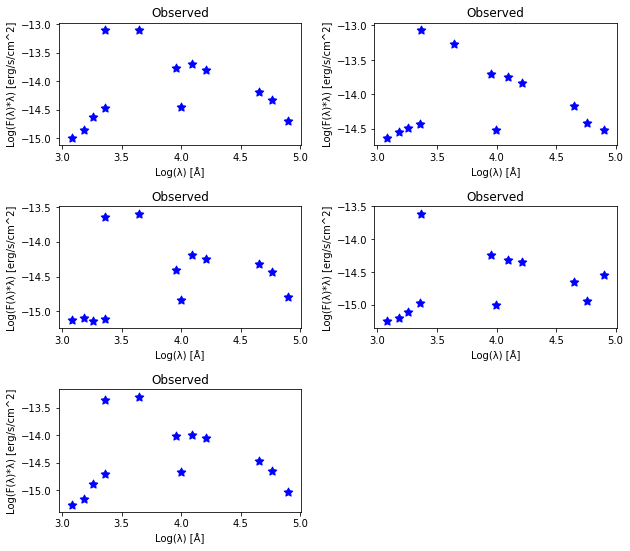

In [62]:
#Flambda Plots
plt.figure(figsize=(10,9))
plt.subplot(321)
plt.scatter(np.log10(g_wave), np.log10(flambda[0]*g_wave), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Observed")

plt.subplot(322)
plt.scatter(np.log10(g_wave), np.log10(flambda[1]*g_wave), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Observed")

plt.subplot(323)
plt.scatter(np.log10(g_wave), np.log10(flambda[2]*g_wave), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Observed")

plt.subplot(324)
plt.scatter(np.log10(g_wave), np.log10(flambda[3]*g_wave), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Observed")

plt.subplot(325)
plt.scatter(np.log10(g_wave), np.log10(flambda[4]*g_wave), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Observed")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [43]:
#Calculating restframe wavelengths
z = zdat['spec_z']
redshift = z[1202],[2226],[3115],[4444],[4811]

rest_wave_1202 = g_wave / (1+z[1202])
rest_wave_2226 = g_wave / (1+z[2226])
rest_wave_3115 = g_wave / (1+z[3115])
rest_wave_4444 = g_wave / (1+z[4444])
rest_wave_4811 = g_wave / (1+z[4811])



C:\Users\Anna\Anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


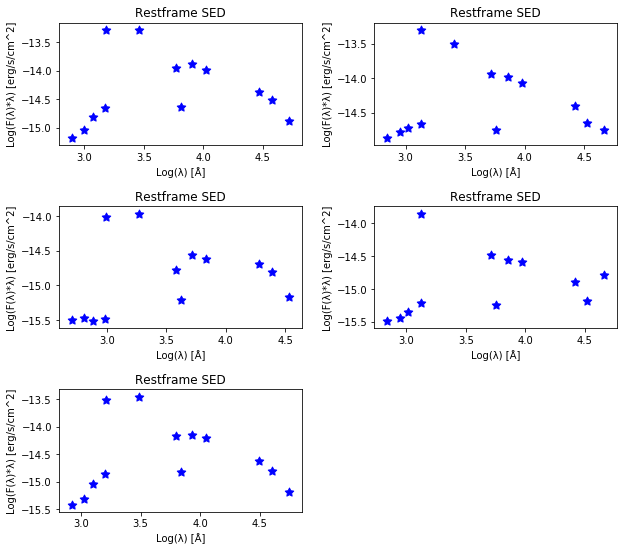

In [61]:
#Restframe Plots
plt.figure(figsize=(10,9))
plt.subplot(321)
plt.scatter(np.log10(rest_wave_1202), np.log10(flambda[0]*rest_wave_1202), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Restframe SED")

plt.subplot(322)
plt.scatter(np.log10(rest_wave_2226), np.log10(flambda[1]*rest_wave_2226), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Restframe SED")

plt.subplot(323)
plt.scatter(np.log10(rest_wave_3115), np.log10(flambda[2]*rest_wave_3115), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Restframe SED")

plt.subplot(324)
plt.scatter(np.log10(rest_wave_4444), np.log10(flambda[3]*rest_wave_4444), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Restframe SED")

plt.subplot(325)
plt.scatter(np.log10(rest_wave_4811), np.log10(flambda[4]*rest_wave_4811), s=80, c='b', marker=(5,1))
plt.xlabel("Log(\u03BB) [\u212B]")
plt.ylabel("Log(F(\u03BB)*\u03BB) [erg/s/cm^2]")
plt.title("Restframe SED")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()